In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


Import Basic Library for Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Rakamin Academy X IDX Partners/loan_data_2007_2014.csv')
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
var = data.dtypes.reset_index()
var.columns = ['Column', 'Data_Type']

In [5]:
features = data.columns.tolist()
list = []
list2 = []
for i in range(0, len(features)):
    x = data[features[i]].nunique()
    y = data[features[i]].unique()
    list.append(x)
    list2.append(y)
var['Num of Uniques'] = list
var['Unique Values'] = list2

In [6]:
var = var.sort_values(by='Num of Uniques', ascending=False)
pd.set_option('display.max_rows', None)
var

,Column,Data_Type,Num of Uniques,Unique Values
0,Unnamed: 0,int64,466285,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
19,url,object,466285,[https://www.lendingclub.com/browse/loanDetail...
2,member_id,int64,466285,"[1296599, 1314167, 1313524, 1277178, 1311748, ..."
1,id,int64,466285,"[1077501, 1077430, 1077175, 1076863, 1075358, ..."
39,total_pymnt,float64,351609,"[5861.071414, 1008.71, 3003.653644, 12226.3022..."
40,total_pymnt_inv,float64,347659,"[5831.78, 1008.71, 3003.65, 12226.3, 3242.17, ..."
42,total_rec_int,float64,270249,"[861.07, 435.17, 603.65, 2209.33, 1009.07, 631..."
59,tot_cur_bal,float64,220690,"[nan, 114834.0, 14123.0, 267646.0, 13605.0, 27..."
11,emp_title,object,205475,"[nan, Ryder, AIR RESOURCES BOARD, University M..."
47,last_pymnt_amnt,float64,198194,"[171.62, 119.66, 649.91, 357.48, 67.79, 161.03..."


In [7]:
print('Variabel bertipe object :', var[var['Data_Type']=='object'].shape)
print('Variabel bertipe numerik :', var[var['Data_Type']!='object'].shape)

Variabel bertipe object : (22, 4)
Variabel bertipe numerik : (53, 4)


Dari kolom var diatas, dapat diidentifikasi terdapat beberapa kolom yang mengandung 100% missing values dan 2 fitur yang hanya terdapat 1 unique value. Fitur yang memiliki salah satu dari dua kondisi tersebut sudah pasti akan di drop, namun sebelum itu mari menghitung persentasi missing values dari setiap kolom.

# Data Cleaning

In [8]:
percent_missing = data.isnull().sum() * 100 / len(data)
dtypes=[data[col].dtype for col in data.columns]
missing_value_df = pd.DataFrame({'data_type':dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,data_type,percent_missing
inq_last_12m,float64,100.000000
total_bal_il,float64,100.000000
dti_joint,float64,100.000000
verification_status_joint,float64,100.000000
annual_inc_joint,float64,100.000000
open_acc_6m,float64,100.000000
open_il_6m,float64,100.000000
open_il_12m,float64,100.000000
open_il_24m,float64,100.000000
mths_since_rcnt_il,float64,100.000000


Missing Values = 100 %:
- inq_last_12m
- total_bal_il
- dti_joint
- verification_status_joint
- annual_inc_joint
- open_acc_6m
- open_il_6m
- open_il_12m
- open_il_24m
- mths_since_rcnt_il
- il_util
- open_rv_24m
- total_cu_tl
- inq_fi
- max_bal_bc
- all_util
- open_rv_12m

Missing Values = 50% untill less than 100%:
- mths_since_last_record = The number of months since the last public record
- mths_since_last_major_derog = Months since most recent 90-day or worse rating
- desc = Loan description provided by the borrower
- mths_since_last_delinq = The number of months since the borrower's last delinquency

Missing Values above 1% untill less than 50%:
- next_payment_d = Last month payment was received
- tot_cur_bal = Total current balance of all accounts
- tot_coll_amt = Total collection amounts ever owed
- total_rev_hi_lim = Total revolving high credit/credit limit
- emp_title = The job title supplied by the Borrower when applying for the loan.
- emp_length = Employment length in years. Possible values are between 0 and - 10 where 0 means less than one year and 10 means ten or more years.

Missing Values below 1%:
- last_pymnt_d = Last month payment was received
- revol_util = Revolving line utilization rate, or the amount of credit the - borrower is using relative to all available revolving credit
- collections_12_mths_ex_med = Number of collections in 12 months excluding medical collections
- last_credit_pull_d = The most recent month LC pulled credit for this loan
- pub_rec = Number of derogatory public records
- inq_last_6mths
- delinq_2yrs
- open_acc = The number of open credit lines in the borrower's credit file
- earliest_cr_line = The month the borrower's earliest reported credit line was opened
- acc_now_delinq = The number of accounts on which the borrower is now delinquent
- total_acc = The total number of credit lines currently in the borrower's credit file
- title object

## Handling Missing Values

Next, akan dilakukan **Handling** terhadap kolom yang memiliki missing values.
- Kolom yang memiliki missing values hingga **100%** akan di**drop**.
- Kolom yang memiliki missing values diantara **50 hingga kurang dari 100% akan diisi 0**.
- Kolom yang memiliki missing values diantara 1** hingga kurang dari 50%** akan diisi **median values untuk numerical data** dan **modus untuk categorical data**.

In [9]:
data_to_handle_mv = data.copy()

# Drop kolom dengan missing values 100%
missing_value_100 = missing_value_df[missing_value_df['percent_missing'] == 100].index.tolist()
data_to_handle_mv = data_to_handle_mv.drop(missing_value_100, axis=1)

# Isi kolom dengan missing values 50%-100% dengan 0
missing_value_50_100 = missing_value_df[(missing_value_df['percent_missing'] >= 50) & (missing_value_df['percent_missing'] < 100)].index.tolist()
for col in missing_value_50_100:
    data_to_handle_mv[col] = data_to_handle_mv[col].fillna(0)

# Isi kolom dengan missing values 1%-50% dengan median atau modus
missing_value_1_50 = missing_value_df[(missing_value_df['percent_missing'] > 1) & (missing_value_df['percent_missing'] < 50)].index.tolist()
for col in missing_value_1_50:
    if pd.api.types.is_numeric_dtype(data_to_handle_mv[col]):
        data_to_handle_mv[col] = data_to_handle_mv[col].fillna(data_to_handle_mv[col].median())
    else:
        data_to_handle_mv[col] = data_to_handle_mv[col].fillna(data_to_handle_mv[col].mode()[0])

# Isi kolom dengan missing values < 1% dengan median atau modus
missing_value_below_1 = missing_value_df[missing_value_df['percent_missing'] <= 1].index.tolist()
for col in missing_value_below_1:
    if pd.api.types.is_numeric_dtype(data_to_handle_mv[col]):
        data_to_handle_mv[col] = data_to_handle_mv[col].fillna(data_to_handle_mv[col].median())
    else:
        data_to_handle_mv[col] = data_to_handle_mv[col].fillna(data_to_handle_mv[col].mode()[0])

Check unique val setiap kolom setelah handling missing values

In [10]:
var2 = data_to_handle_mv.dtypes.reset_index()
var2.columns = ['Column', 'Data_Type']

data_handled_mv = data_to_handle_mv.copy()

features = data_handled_mv.columns.tolist()
nunique_list = []
unique_val_list =  []
for i in range(0, len(features)):
    x = data_handled_mv[features[i]].nunique()
    y = data_handled_mv[features[i]].unique()
    nunique_list.append(x)
    unique_val_list.append(y)
var2['Num of Uniques'] = nunique_list
var2['Unique Values'] = unique_val_list

var2 = var2.sort_values(by='Num of Uniques', ascending=False)
pd.set_option('display.max_rows', None)
var2

,Column,Data_Type,Num of Uniques,Unique Values
0,Unnamed: 0,int64,466285,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,466285,"[1077501, 1077430, 1077175, 1076863, 1075358, ..."
19,url,object,466285,[https://www.lendingclub.com/browse/loanDetail...
2,member_id,int64,466285,"[1296599, 1314167, 1313524, 1277178, 1311748, ..."
39,total_pymnt,float64,351609,"[5861.071414, 1008.71, 3003.653644, 12226.3022..."
40,total_pymnt_inv,float64,347659,"[5831.78, 1008.71, 3003.65, 12226.3, 3242.17, ..."
42,total_rec_int,float64,270249,"[861.07, 435.17, 603.65, 2209.33, 1009.07, 631..."
56,tot_cur_bal,float64,220690,"[81539.0, 114834.0, 14123.0, 267646.0, 13605.0..."
11,emp_title,object,205475,"[Teacher, Ryder, AIR RESOURCES BOARD, Universi..."
47,last_pymnt_amnt,float64,198194,"[171.62, 119.66, 649.91, 357.48, 67.79, 161.03..."


drop column yang hanya terdapat 1 unique values

In [11]:
# Drop 'policy_code' and 'application_type' columns
data_handled_mv = data_handled_mv.drop(['Unnamed: 0','policy_code', 'application_type'], axis=1)

check missing values

In [12]:
percent_missing = data_handled_mv.isnull().sum() * 100 / len(data_handled_mv)
dtype = [data_handled_mv[col].dtype for col in data_handled_mv.columns]
missing_value_data_handled_mv = pd.DataFrame({'data_type': dtype,
                                             'percent_missing': percent_missing})
missing_value_data_handled_mv.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data_handled_mv

,data_type,percent_missing
id,int64,0.0
total_rec_int,float64,0.0
open_acc,float64,0.0
pub_rec,float64,0.0
revol_bal,int64,0.0
revol_util,float64,0.0
total_acc,float64,0.0
initial_list_status,object,0.0
out_prncp,float64,0.0
out_prncp_inv,float64,0.0


## Drop Duplicate Rows

In [13]:
data_handled_mv.duplicated().sum()

0

Tidak ada data duplikat pada dataset

In [14]:
print("Shape of data before handling missing values:", data.shape)
print("Shape of numerical features in original data:", data.select_dtypes(include=np.number).shape)
print("Shape of categorical features in original data:", data.select_dtypes(include='object').shape)
print('-------------------------------------------------------------------------------------------')

print("Shape of data after handling missing values:", data_handled_mv.shape)
print("Shape of numerical features in handled data:", data_handled_mv.select_dtypes(include=np.number).shape)
print("Shape of categorical features in handled data:", data_handled_mv.select_dtypes(include='object').shape)

Shape of data before handling missing values: (466285, 75)
Shape of numerical features in original data: (466285, 53)
Shape of categorical features in original data: (466285, 22)
-------------------------------------------------------------------------------------------
Shape of data after handling missing values: (466285, 55)
Shape of numerical features in handled data: (466285, 34)
Shape of categorical features in handled data: (466285, 21)


## Formatting Target

Karena objektif pada case credit analysis ini adalah untuk memprediksi 'high risk' loan dan 'low risk' loan sehingga dapat membantu decision making company dalam melakukan approval pada pinjman di masa depan maka klasifikasi dibatasi pada dua target features yaitu 'good' loan dan 'bad' loan. Bad Loan akan dilabeli 0 dan Good Loan akan dilabeli 1.


In [15]:
#cek ulang unique values dari kolom loan_status

print(data_handled_mv['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


untuk label Good Loan (1) akan menggantikan values:
- Fully Paid,
- Does not meet the credit policy. Status:Fully Paid

untuk label Bad Loan (0) akan menggantikan values:
- Default
- Late (16-30 days)
- Late (31-120 days)
- Does not meet the credit policy. Status:Charged Off

sementara untuk sisanya, akan di drop karena tidak bisa dideteksi sebagai Good atau Bad Loan.

In [16]:
# Create a mapping dictionary for loan status
loan_status_mapping = {
    'Fully Paid': 1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Default': 0,
    'Late (16-30 days)': 0,
    'Late (31-120 days)': 0,
    'Does not meet the credit policy. Status:Charged Off': 0,
    'Charged Off': 0
}

# Use the mapping to transform the 'loan_status' column
data_handled_mv['loan_status'] = data_handled_mv['loan_status'].map(loan_status_mapping)

# Drop rows where loan_status is NaN (after mapping)
data_handled_mv.dropna(subset=['loan_status'], inplace=True)

# Convert 'loan_status' column to integer type
data_handled_mv['loan_status'] = data_handled_mv['loan_status'].astype(int)

print(data_handled_mv['loan_status'].unique())

[1 0]


In [17]:
# prompt: coba cek jumlah dan persentasi jumlah dari masing-masing kategori 1 dan 0 dari `loan_status`

# Count the occurrences of each loan status category
loan_status_counts = data_handled_mv['loan_status'].value_counts()

# Calculate the percentage of each category
loan_status_percentages = (loan_status_counts / len(data_handled_mv)) * 100

# Print the results
print("Jumlah dan Persentase Loan Status:")
print(loan_status_counts)
print("\n")
loan_status_percentages


Jumlah dan Persentase Loan Status:
loan_status
1    186727
0     52186
Name: count, dtype: int64




,count
loan_status,
1,78.156902
0,21.843098


In [18]:
data_handled_mv.shape

(238913, 55)

# Exploratory Data Analysis

In [19]:
data_prep = data_handled_mv.copy()
data_prep.shape

(238913, 55)

## Statistical Summary for Categorical

In [20]:
#menghapus spasi
data_prep.term = data_prep.term.str.lstrip()

In [21]:
data_prep = data_prep.drop(['url', 'desc', 'title', 'zip_code'], axis=1)

In [22]:
data_prep.shape

(238913, 51)

In [23]:
#pisahkan categorical dan numerical pada dataset prep
nums = []
cats = []
for i in data_prep.columns:
  if data_prep[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)
print('jumlah = ',len(nums))
print('nums = ',nums)
print('jumlah = ',len(cats))
print('cats = ',cats)

jumlah =  35
nums =  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
jumlah =  16
cats =  ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [24]:
data_prep[cats].describe().transpose()

,count,unique,top,freq
term,238913,2,36 months,186469
grade,238913,7,B,72239
sub_grade,238913,35,B3,17375
emp_title,238913,129889,Teacher,15130
emp_length,238913,11,10+ years,80537
home_ownership,238913,6,MORTGAGE,117376
verification_status,238913,3,Verified,88823
issue_d,238913,91,Oct-14,9884
pymnt_plan,238913,2,n,238906
purpose,238913,14,debt_consolidation,139085


okay, because of the cardinality is too high, we will drop the url, desc, title, and zip column

In [25]:
cats.remove('emp_title')
for i in cats:
  print('-----'*10)
  print(i)
  print(data_prep[i].value_counts())

--------------------------------------------------
term
term
36 months    186469
60 months     52444
Name: count, dtype: int64
--------------------------------------------------
grade
grade
B    72239
C    61042
A    39500
D    38715
E    18086
F     7348
G     1983
Name: count, dtype: int64
--------------------------------------------------
sub_grade
sub_grade
B3    17375
B4    16126
C1    14012
B2    13927
B5    13414
C2    13377
C3    11923
B1    11397
C4    11232
A5    11101
C5    10498
A4    10380
D1     9529
D2     8713
D3     7613
D4     7048
A3     6753
D5     5812
A2     5765
A1     5501
E1     4370
E2     4344
E3     3541
E4     3151
E5     2680
F1     2107
F2     1684
F3     1509
F4     1143
F5      905
G1      670
G2      481
G3      332
G4      259
G5      241
Name: count, dtype: int64
--------------------------------------------------
emp_length
emp_length
10+ years    80537
2 years      22352
< 1 year     19998
3 years      19395
5 years      17297
1 year       16078
4 y

Hasil pengamatan:
- kolom `issue_d`,`earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d`, `dan last_credit_pull_d` tipe datanya dapat diubah ke datetime,
- kolom initial list_status pada feature engineering dpt diubah ke biner

## Statistical Summary for Numerical

In [26]:
data_prep[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,238913.0,8.584147e+06,9.288258e+06,54734.00,1.382529e+06,5.524581e+06,12485970.00,3.785416e+07
member_id,238913.0,9.703611e+06,1.007888e+07,70473.00,1.616779e+06,6.479428e+06,14457393.00,4.061688e+07
loan_amnt,238913.0,1.348621e+04,8.066725e+03,500.00,7.200000e+03,1.200000e+04,18000.00,3.500000e+04
funded_amnt,238913.0,1.344080e+04,8.042190e+03,500.00,7.200000e+03,1.200000e+04,18000.00,3.500000e+04
funded_amnt_inv,238913.0,1.331266e+04,8.080099e+03,0.00,7.125000e+03,1.191431e+04,18000.00,3.500000e+04
int_rate,238913.0,1.385545e+01,4.380770e+00,5.42,1.099000e+01,1.367000e+01,16.59,2.606000e+01
installment,238913.0,4.169350e+02,2.437504e+02,15.67,2.394100e+02,3.652300e+02,545.96,1.408130e+03
annual_inc,238913.0,7.192851e+04,5.510376e+04,1896.00,4.500000e+04,6.146200e+04,86000.00,7.141778e+06
loan_status,238913.0,7.815690e-01,4.131823e-01,0.00,1.000000e+00,1.000000e+00,1.00,1.000000e+00
dti,238913.0,1.643968e+01,7.698582e+00,0.00,1.072000e+01,1.614000e+01,21.88,3.999000e+01


## Univariate Analysis for Categorical

sebelum melanjutkan, mari kita cek atribut target `loan_status` terlebih dahulu

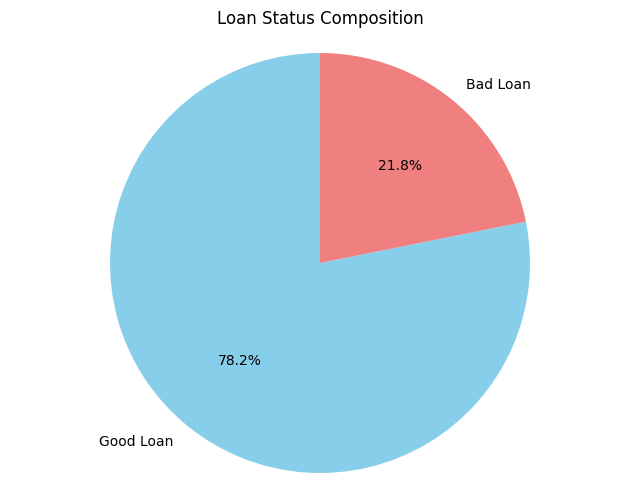

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'data_handled_mv' is your DataFrame and 'loan_status' is the column
loan_status_counts = data_handled_mv['loan_status'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(loan_status_counts, labels=['Good Loan', 'Bad Loan'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Loan Status Composition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Terlihat bahwa komposisi atribut target kita tidak seimbang, ini akan berpotensi bias pada model dan berpengaruh pada pemilihan metriks akurasi/presisi/f1-score. Namun, tidak akan jadi masalah jika kita melakukan undersampling/oversampling sebelum masuk ke modelling.

Selanjutnya mari menggali insight satu persatu dari data lewat pertanyaan analitis.

Q1: Who frequently applied for credit?

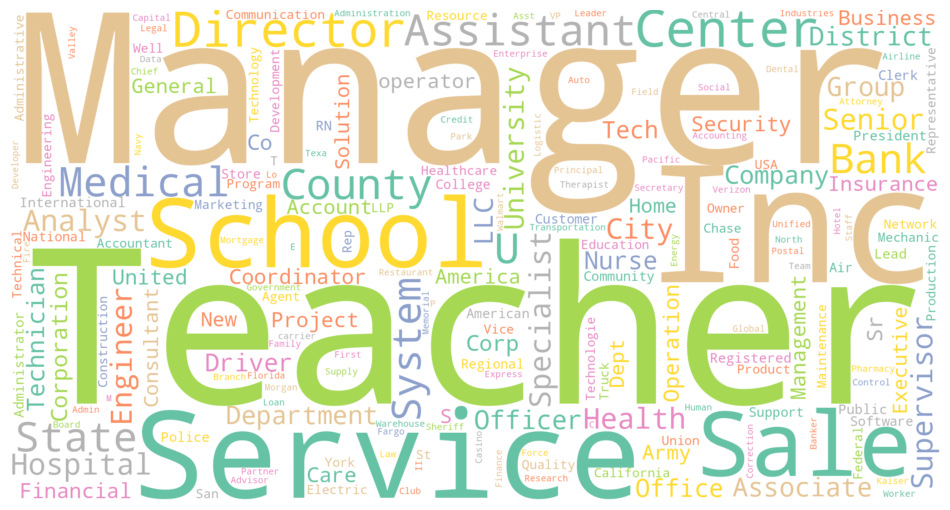

In [28]:
title_loan = " ".join(str(tujuan) for tujuan in data_prep.emp_title)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080, colormap='Set2').generate(title_loan)

plt.figure(figsize = (12, 12))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

Terlihat bahwa profesi yang paling banyak melakukan credit ialah Manager, Teacher, ASsistant, dan Director

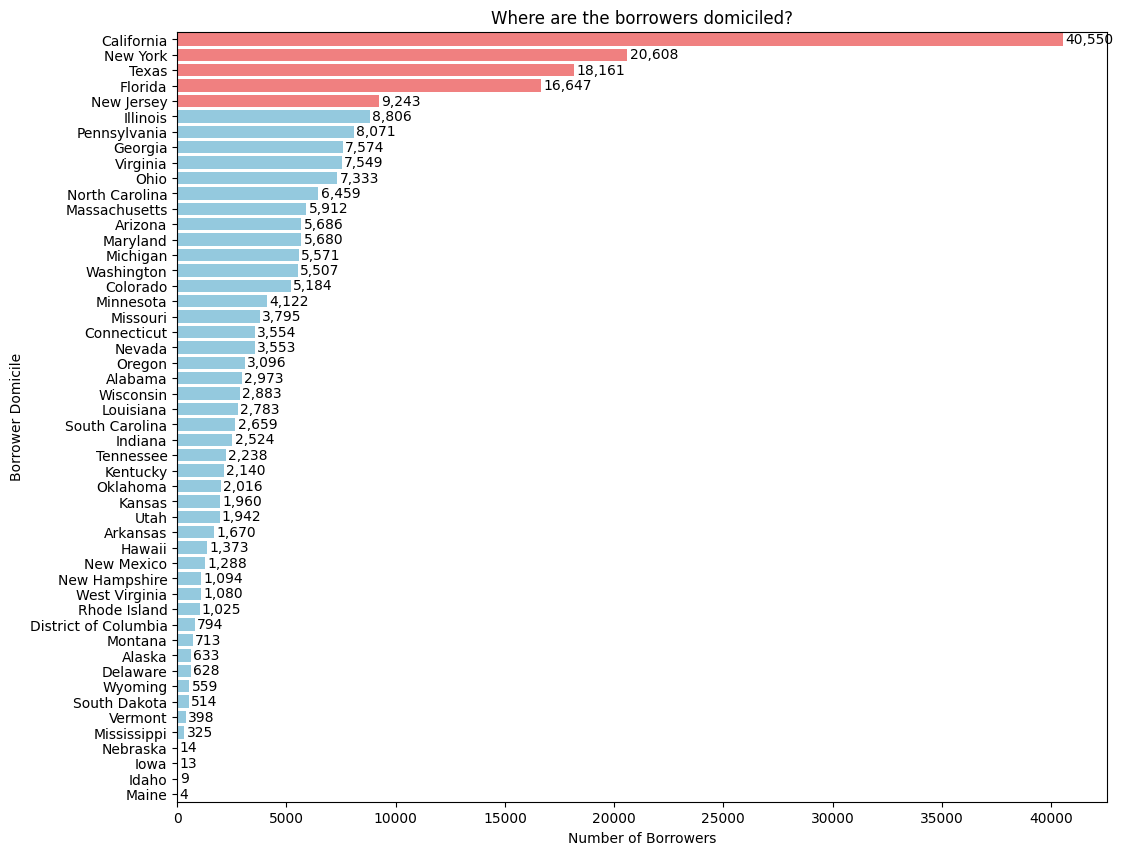

In [29]:
# Create a mapping for state abbreviations to actual state names (replace with your actual mapping)
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
'DC': 'District of Columbia', 'PR': 'Puerto Rico', 'VI': 'Virgin Islands'

}

# Apply the mapping to the 'addr_state' column
data_to_viz = data_prep.copy()
data_to_viz['addr_state_name'] = data_to_viz['addr_state'].map(state_mapping).fillna(data_to_viz['addr_state'])

# Count the occurrences of each state
state_counts = data_to_viz['addr_state_name'].value_counts().sort_values(ascending=False)

# Create a list of top 5 states
top_5_states = state_counts.head(5).index.tolist()

# Create the column chart
plt.figure(figsize=(12, 10))
ax = sns.countplot(y='addr_state_name', data=data_to_viz, order=state_counts.index, palette=["skyblue"] * len(state_counts))
plt.title("Where are the borrowers domiciled?")

# Highlight the top 5 states with a different color
for i, bar in enumerate(ax.patches):
    count = state_counts.iloc[i]  # Get the number of borrowers
    ax.text(
        bar.get_width() + 100,  # Position label slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically
        f"{count:,}",  # Format with commas for better readability
        va='center', ha='left', fontsize=10, color='black'
    )
    if state_counts.index[i] in top_5_states:
        bar.set_facecolor('lightcoral')

# Customize the chart
plt.xlabel("Number of Borrowers")
plt.ylabel("Borrower Domicile")
plt.show()


<Figure size 1200x600 with 0 Axes>

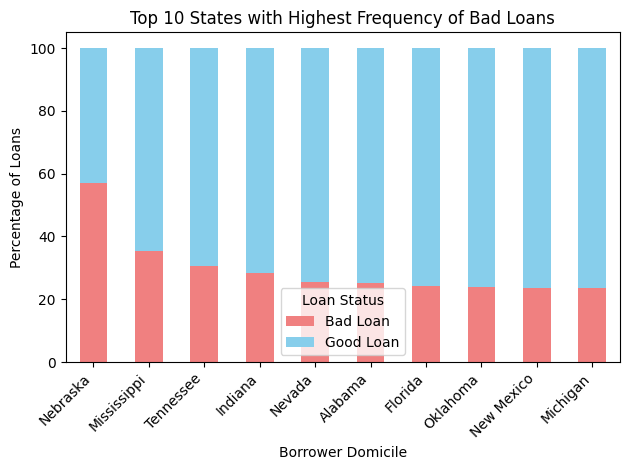

In [30]:
# Calculate the percentage of bad loans for each state
bad_loan_percentages = data_to_viz.groupby('addr_state_name')['loan_status'].value_counts(normalize=True).unstack() * 100

# Select the top 10 states with the highest frequency of bad loans
top_10_states = bad_loan_percentages[0].nlargest(10).index

# Create the proportional stacked bar chart
plt.figure(figsize=(12, 6))
bad_loan_percentages.loc[top_10_states, [0, 1]].plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])
plt.title("Top 10 States with Highest Frequency of Bad Loans")
plt.xlabel("Borrower Domicile")
plt.ylabel("Percentage of Loans")
plt.legend(title="Loan Status", labels=["Bad Loan", "Good Loan"])
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

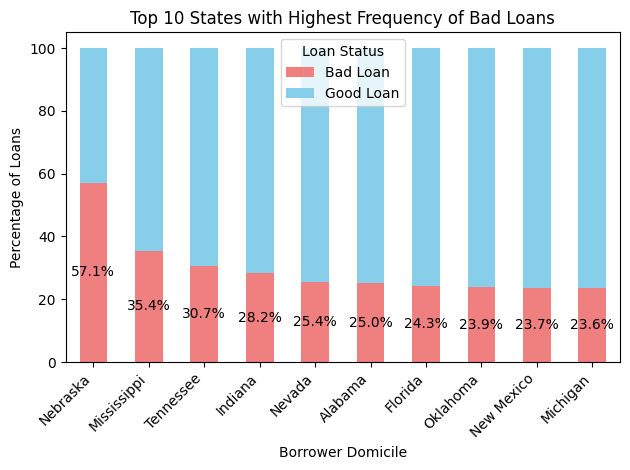

In [31]:
# Calculate the percentage of bad loans for each state
bad_loan_percentages = data_to_viz.groupby('addr_state_name')['loan_status'].value_counts(normalize=True).unstack() * 100

# Select the top 10 states with the highest frequency of bad loans
top_10_states = bad_loan_percentages[0].nlargest(10).index

# Create the proportional stacked bar chart
plt.figure(figsize=(12, 6))
ax = bad_loan_percentages.loc[top_10_states, [0, 1]].plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])

plt.title("Top 10 States with Highest Frequency of Bad Loans")
plt.xlabel("Borrower Domicile")
plt.ylabel("Percentage of Loans")
plt.legend(title="Loan Status", labels=["Bad Loan", "Good Loan"])
plt.xticks(rotation=45, ha='right')

# Add labels for bad loan percentage
for i, bar in enumerate(ax.patches):
    if i < len(top_10_states):  # Only label Bad Loan (bottom stack)
        height = bar.get_height()
        if height > 5:  # Only show label if the percentage is significant
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center horizontally
                bar.get_y() + height / 2,  # Position at middle of bad loan bar
                f"{height:.1f}%",  # Format as percentage with 1 decimal
                ha='center', va='center', fontsize=10, color='black'
            )

plt.tight_layout()
plt.show()

In [32]:
# Filter data for Nebraska and display relevant columns
Nebraska_data = data_to_viz[data_to_viz['addr_state_name'] == 'Nebraska']
print(Nebraska_data[['addr_state_name', 'loan_status']])


       addr_state_name  loan_status
38754         Nebraska            1
39569         Nebraska            0
39720         Nebraska            1
39736         Nebraska            0
39737         Nebraska            0
41857         Nebraska            0
41982         Nebraska            0
42225         Nebraska            1
42346         Nebraska            0
42384         Nebraska            1
42454         Nebraska            1
55648         Nebraska            0
62788         Nebraska            1
183823        Nebraska            0


In [33]:
#Q2: Where are the borrowers domiciled?

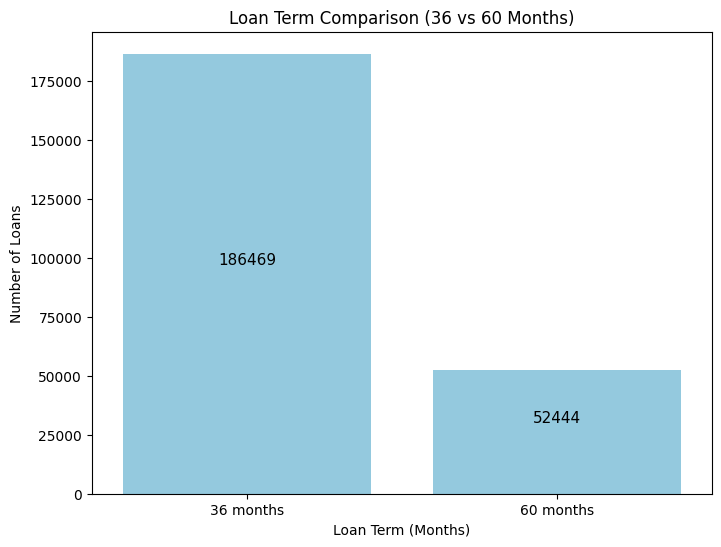

In [34]:
# prompt: tampilkan menggunakan column chart untuk menampilkan perbandingan frekuensi pinjaman dengan term 36 bulan vs 60 bulan. Gunakan color skyblue. Title menggunakan bahasa inggris. Pastikan terdapat label

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_prep' is your DataFrame
term_counts = data_prep['term'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='term', data=data_prep, palette=['skyblue'])
plt.title('Loan Term Comparison (36 vs 60 Months)')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Number of Loans')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()/2),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()


<Figure size 1000x600 with 0 Axes>

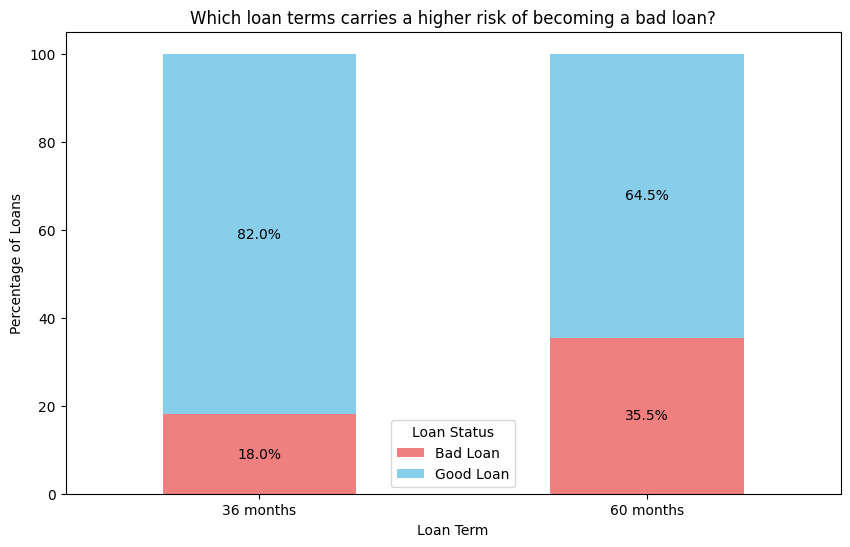

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_prep' is your DataFrame and 'term' and 'loan_status' are your columns
plt.figure(figsize=(10, 6))

# Calculate the percentage for each loan_status within each term
loan_status_percentage = data_prep.groupby(['term', 'loan_status']).size().unstack().fillna(0)
loan_status_percentage = loan_status_percentage.div(loan_status_percentage.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = loan_status_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], figsize=(10, 6))

# Set titles and labels
plt.title('Which loan terms carries a higher risk of becoming a bad loan?')
plt.xlabel('Loan Term')
plt.ylabel('Percentage of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Bad Loan', 'Good Loan'])

# Annotate the bars with the percentage at the center of each section
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only annotate non-zero sections
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center horizontally
                bar.get_y() + height / 2,  # Center vertically
                f'{height:.1f}%',
                ha='center', va='center', color='black', fontsize=10
            )

plt.show()


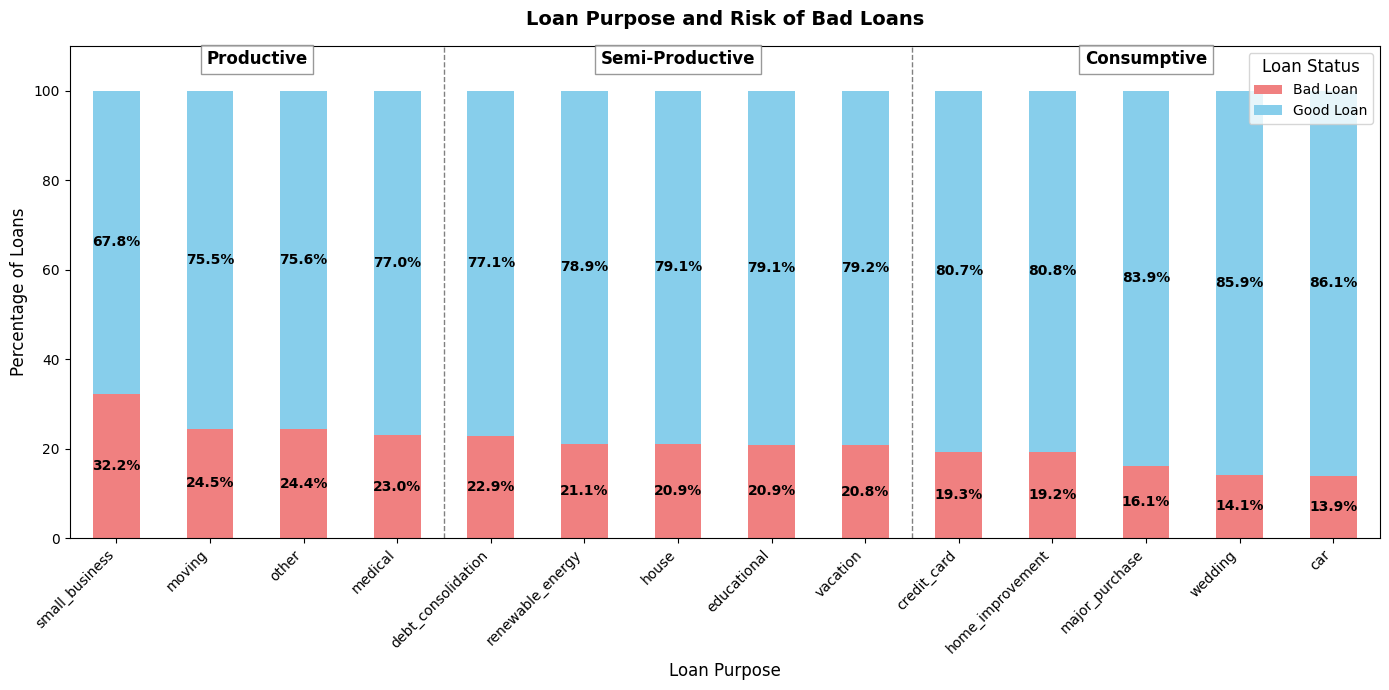

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kategorisasi loan purpose berdasarkan produktivitas dan risiko
category_order = {
    'Productive': ['small_business', 'educational', 'renewable_energy', 'home_improvement'],
    'Semi-Productive': ['house', 'car', 'debt_consolidation', 'credit_card', 'major_purchase'],
    'Consumptive': ['medical', 'moving', 'wedding', 'vacation', 'other']
}

# Menentukan urutan berdasarkan kategori
ordered_purpose = sum(category_order.values(), [])  # Flatten list
purpose_loan_status = data_to_viz.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack() * 100

# Sort berdasarkan kategori, lalu risiko (bad loan tertinggi di dalam tiap kategori)
purpose_loan_status_sorted = purpose_loan_status.loc[ordered_purpose].sort_values(0, ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
purpose_loan_status_sorted[[0, 1]].plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], ax=ax)

# Title & Labels
plt.title('Loan Purpose and Risk of Bad Loans', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Percentage of Loans', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Loan Status', labels=['Bad Loan', 'Good Loan'], fontsize=10, title_fontsize=12)

# Annotate with percentages inside bars
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            text_color = 'white' if bar.get_facecolor() == (1.0, 0.4, 0.4, 1.0) else 'black'  # Adjust color
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center', va='center', color=text_color, fontsize=10, fontweight='bold'
            )

# Tambahkan garis pemisah kategori & label di atas chart
x_pos = 0
category_positions = []
for category, purposes in category_order.items():
    x_pos += len(purposes)
    if x_pos < len(ordered_purpose):
        ax.axvline(x=x_pos - 0.5, color='gray', linestyle='--', lw=1)
    category_positions.append((sum(ordered_purpose.index(p) for p in purposes) / len(purposes), category))

# Tambahkan label kategori di atas chart
for pos, category in category_positions:
    ax.text(pos, 105, category, ha='center', va='bottom', fontsize=12, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.ylim(0, 110)  # Beri ruang untuk label kategori
plt.tight_layout()
plt.show()


# Feature Engineering and Feature Selection

In [38]:
# Convert specified columns to datetime objects
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

for col in date_columns:
    try:
        data_to_viz[col] = pd.to_datetime(data_prep[col], errors='coerce')
    except KeyError:
        print(f"Column '{col}' not found in the DataFrame. Skipping...")


In [39]:
!pip install dython

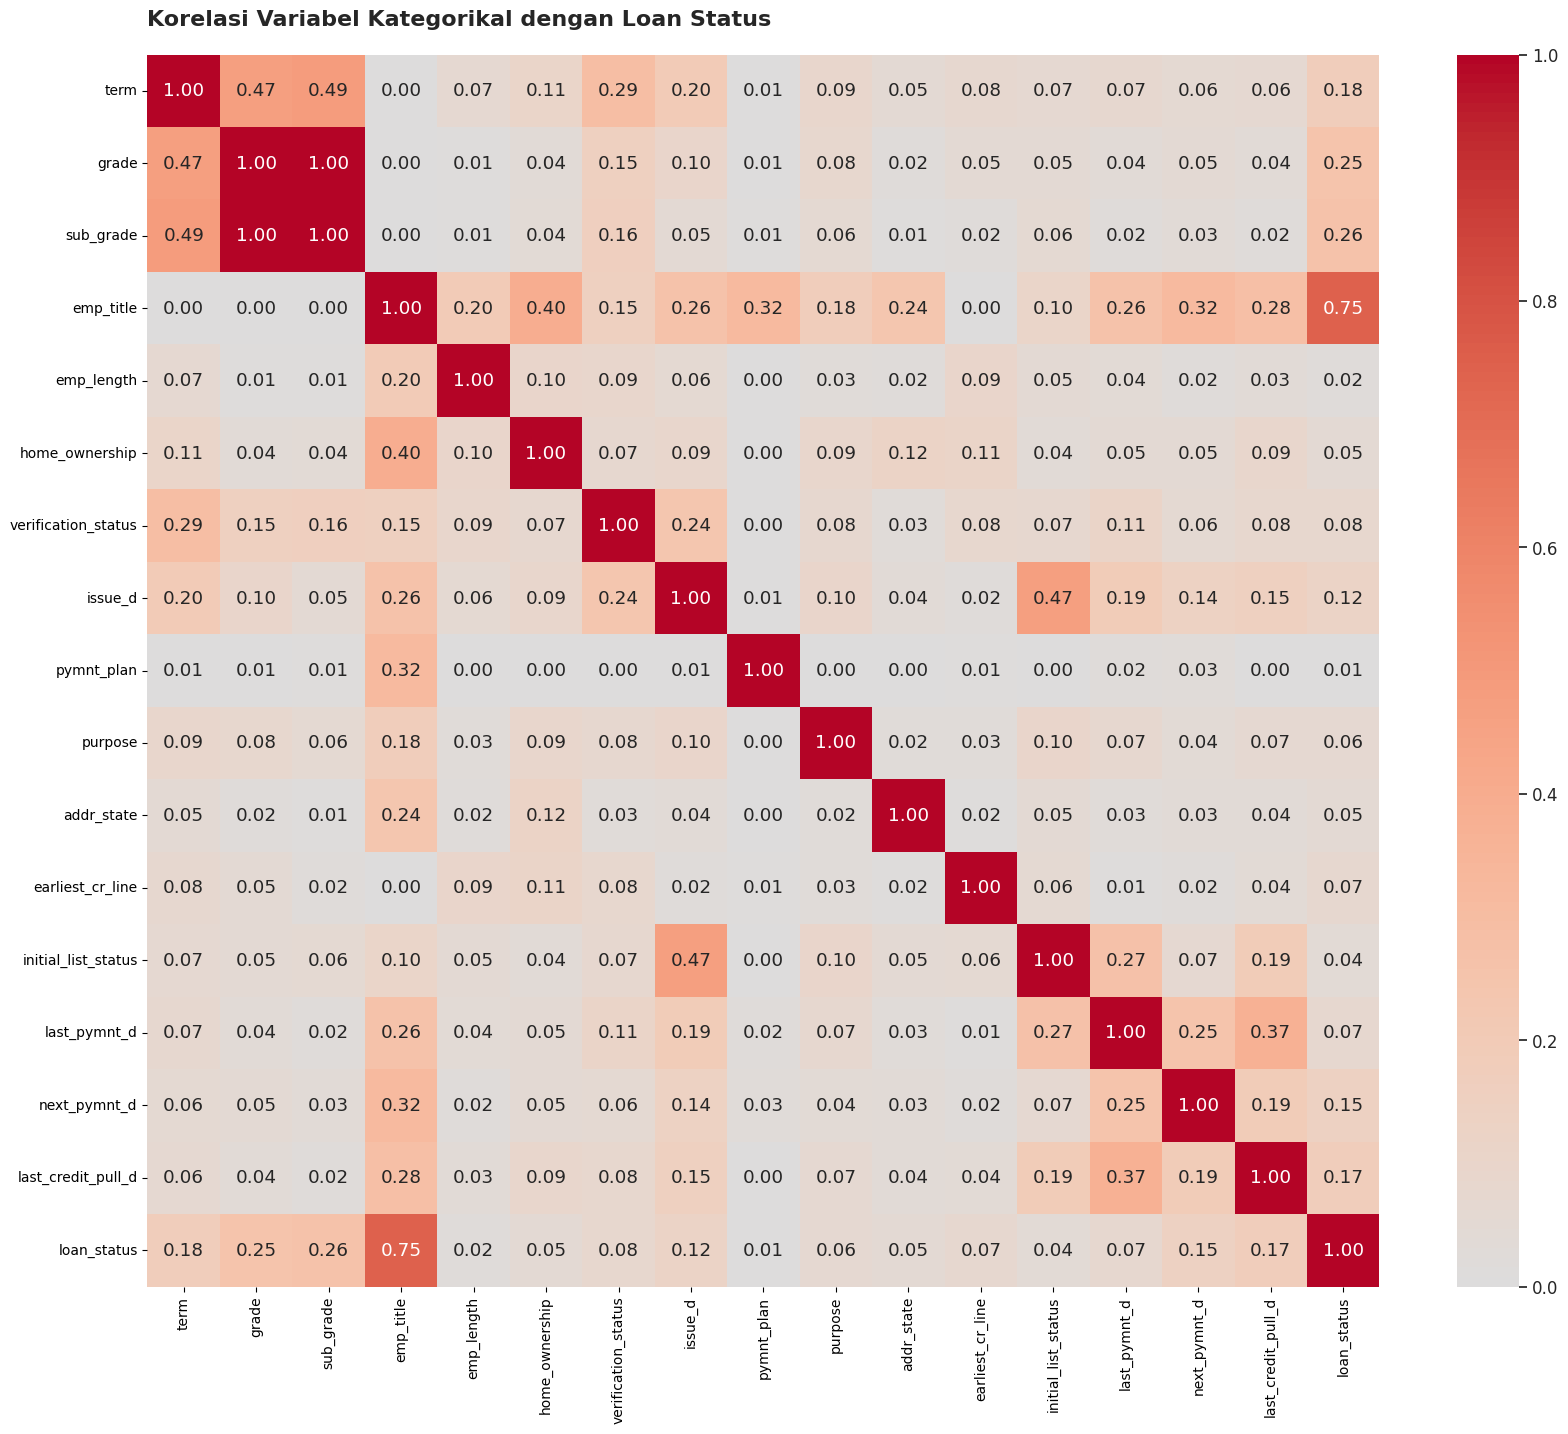

In [40]:
from dython.nominal import associations
# Korelasi fitur Categorical/Object
cat_data = data_prep.select_dtypes(include=['object', 'category'])

# Tambahkan target variable (misal: 'loan_status')
cat_data['loan_status'] = data_prep['loan_status']

# Plot ukuran besar agar lebih jelas
fig, ax = plt.subplots(figsize=(20, 16))
sns.set(font_scale=1.1)
plt.text(x=0, y=-0.4, s="Korelasi Variabel Kategorikal dengan Loan Status", fontsize=16, weight='bold')

# Estimasi dan buat heatmap dengan Cramér's V
cramers_v = associations(cat_data, nom_nom_assoc='cramer', cmap="coolwarm", ax=ax)

plt.show()

In [41]:
# Ambil fitur kategorikal
cat_data = data_prep.select_dtypes(include=['object', 'category'])

# Hitung matriks korelasi Cramér’s V
cramers_v_matrix = associations(cat_data, nom_nom_assoc='cramer', compute_only=True)['corr']

# Ambil korelasi di atas 0.7 (tanpa diagonal)
upper_tri = cramers_v_matrix.where(np.triu(np.ones(cramers_v_matrix.shape), k=1).astype(bool))
high_corr_categorical = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

print(high_corr_categorical)

['sub_grade']


Dari sini terlihat bahwa sub_grade dan grade memiliki nilai korelasi tinggi, sehingga kita perlu melakukan drop untuk salah satunya (kita coba drop sub_grade)

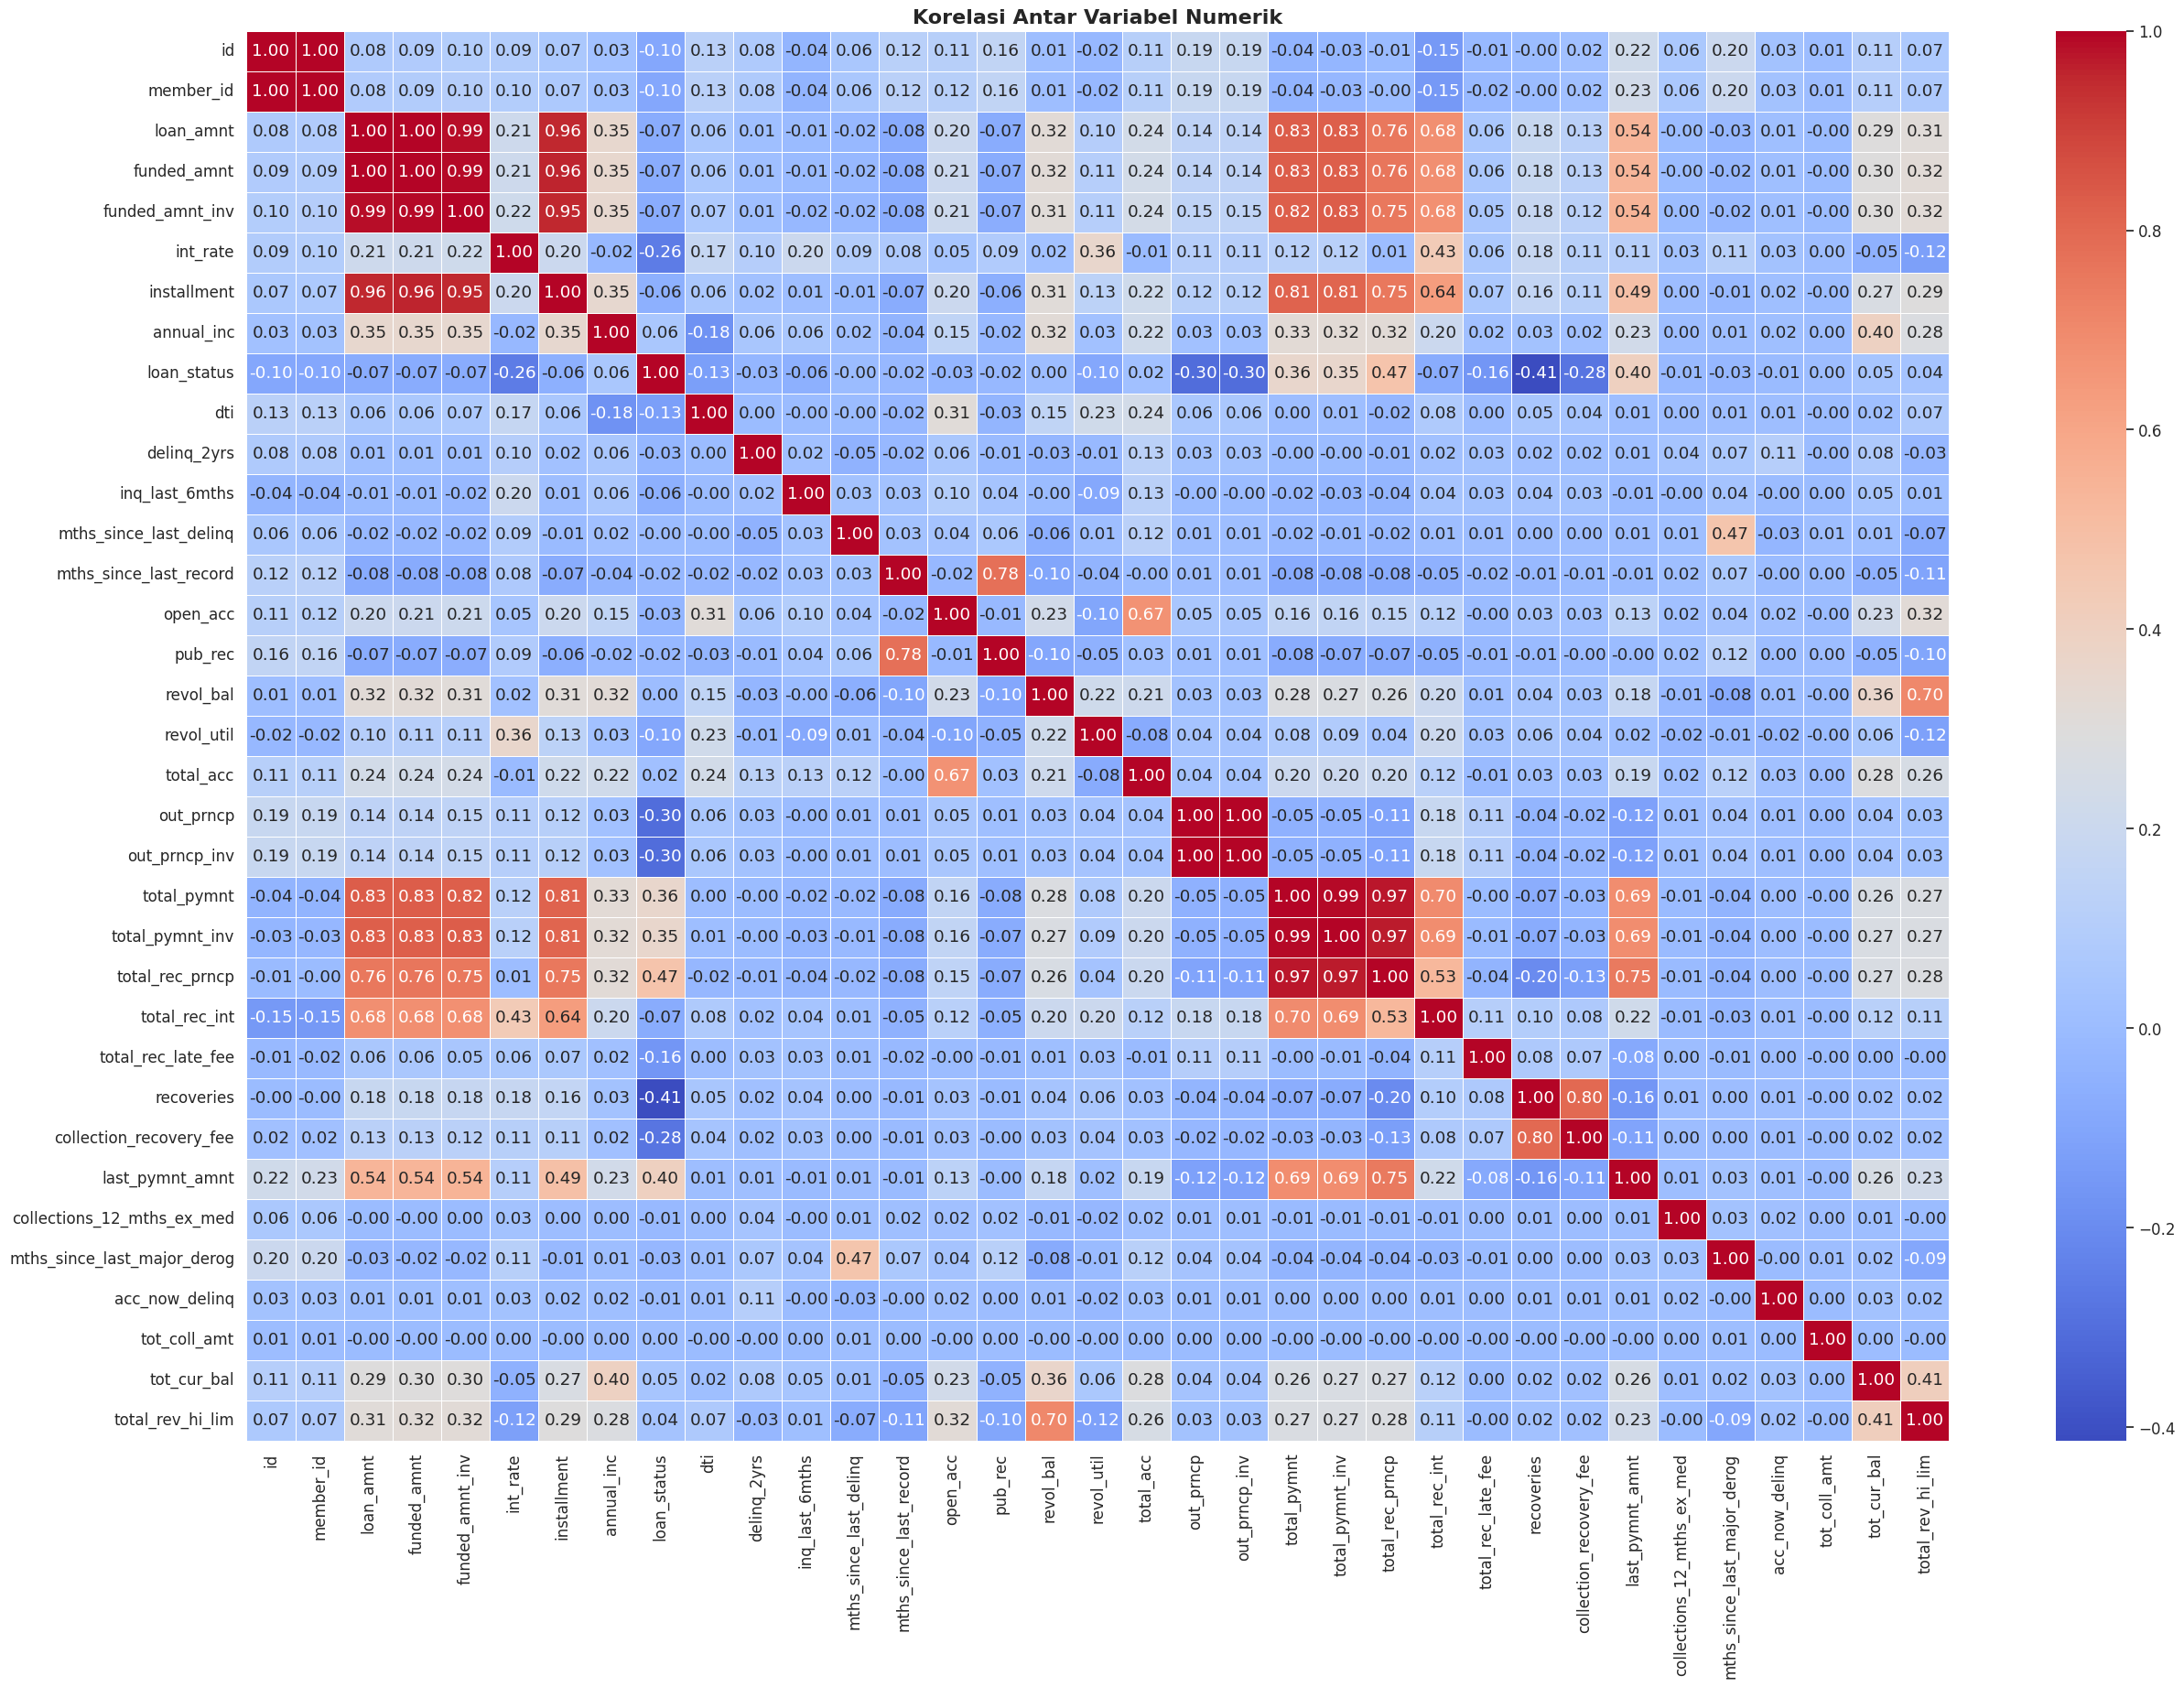

In [42]:
# Korelasi fitur Numerical
num_data = data_to_viz.select_dtypes(include=['number'])

# Hitung matriks korelasi (Pearson atau Spearman)
corr_matrix = num_data.corr(method='pearson')  # Ganti 'spearman' jika perlu

# Plot Heatmap
plt.figure(figsize=(30, 20))
sns.set(font_scale=1.1)
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Korelasi Antar Variabel Numerik", fontsize=16, weight='bold')
plt.show()

In [43]:
# Ambil fitur numerik
num_data = data_to_viz.select_dtypes(include=['number'])

# Hitung matriks korelasi (gunakan Pearson atau Spearman jika diperlukan)
corr_matrix = num_data.corr(method='pearson')

# Ambil korelasi di atas 0.7 (tanpa diagonal)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_numerical = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

print(high_corr_numerical)

['member_id', 'funded_amnt', 'funded_amnt_inv', 'installment', 'pub_rec', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_rev_hi_lim']


Terlihat bahwa terdapat beberapa fitur yang memiliki korelasi terlalu tinggi sehingga kita bisa melakukan drop untuk salah satu fitur dari pasangan fitur berkorelasi tinggi. Kita ambil hasil list diatas sebagai fitur yang akan didrop.

In [44]:
features_to_drop = ['sub_grade', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'installment', 'pub_rec', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_rev_hi_lim']
data_prep = data_prep.drop(features_to_drop, axis=1)


In [45]:
data_prep.shape

(238913, 38)

## Encoding the categorical data

In [71]:
df1 = data_prep.copy()

In [72]:
categorical_cols = [col for col in df1.select_dtypes(include='object').columns.tolist()if col not in ['bad_flag']]

In [73]:
categorical_cols

['term',
 'grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [75]:
numerical_cols = [col for col in df1.select_dtypes(include=np.number).columns.tolist() if col not in ['bad_flag']]
numerical_cols


['id',
 'loan_amnt',
 'int_rate',
 'annual_inc',
 'loan_status',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal']

In [76]:
df1 = df1.drop(['emp_title'], axis=1)

In [77]:
df1 = df1.drop(['id','issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line'], axis=1)


In [78]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [79]:
#test encoding
df1['term']= label_encoder.fit_transform(df1['term'])
df1['term'].unique()

array([0, 1])

In [80]:
df1['grade']= label_encoder.fit_transform(df1['grade'])
df1.loc[df1['emp_length'] == '< 1 year', 'emp_length'] = 0
df1.loc[df1['emp_length'] == '1 year', 'emp_length'] = 1
df1.loc[df1['emp_length'] == '2 years', 'emp_length'] = 1
df1.loc[df1['emp_length'] == '3 years', 'emp_length'] = 1
df1.loc[df1['emp_length'] == '4 years' , 'emp_length'] =2
df1.loc[df1['emp_length'] == '5 years' , 'emp_length'] =2
df1.loc[df1['emp_length'] == '6 years', 'emp_length'] = 2
df1.loc[df1['emp_length'] == '7 years' , 'emp_length'] = 3
df1.loc[df1['emp_length'] == '8 years' , 'emp_length'] =3
df1.loc[df1['emp_length'] == '9 years', 'emp_length'] = 3
df1.loc[df1['emp_length'] == '10+ years', 'emp_length'] = 4
df1['home_ownership']= label_encoder.fit_transform(df1['home_ownership'])
df1['verification_status']= label_encoder.fit_transform(df1['verification_status'])
df1['pymnt_plan']= label_encoder.fit_transform(df1['pymnt_plan'])
df1['purpose']= label_encoder.fit_transform(df1['purpose'])
df1['initial_list_status']= label_encoder.fit_transform(df1['initial_list_status'])
df1['addr_state']= label_encoder.fit_transform(df1['addr_state'])

## Splitting Data

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
df2 = df1.copy()
X = df2.drop(columns="loan_status")
y = df2.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((191130, 30), (47783, 30), (191130,), (47783,))

In [83]:
#scalling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_train_scaled.shape

(191130, 30)

In [84]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,191130.0,0.138630,0.747508,-1.064815,-0.444444,0.0,0.555556,2.129630e+00
term,191130.0,0.219636,0.414001,0.000000,0.000000,0.0,0.000000,1.000000e+00
int_rate,191130.0,0.033909,0.781736,-1.473214,-0.478571,0.0,0.521429,2.212500e+00
grade,191130.0,-0.096403,0.670629,-1.000000,-0.500000,0.0,0.500000,2.000000e+00
emp_length,191130.0,0.135222,0.459536,-0.666667,-0.333333,0.0,0.666667,6.666667e-01
home_ownership,191130.0,-0.262973,0.483611,-1.000000,-0.750000,0.0,0.250000,2.500000e-01
annual_inc,191130.0,0.246669,1.287561,-1.461073,-0.409756,0.0,0.590244,1.726824e+02
verification_status,191130.0,0.012633,0.424073,-0.500000,-0.500000,0.0,0.500000,5.000000e-01
pymnt_plan,191130.0,0.000037,0.006052,0.000000,0.000000,0.0,0.000000,1.000000e+00
purpose,191130.0,0.857626,2.633763,-2.000000,0.000000,0.0,0.000000,1.100000e+01


## SMOTE for Imbalancing Target Atributte

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled_df, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 149381
Before OverSampling, counts of label '0': 41749 

After OverSampling, the shape of train_X: (298762, 30)
After OverSampling, the shape of train_y: (298762,) 

After OverSampling, counts of label '1': 149381
After OverSampling, counts of label '0': 149381


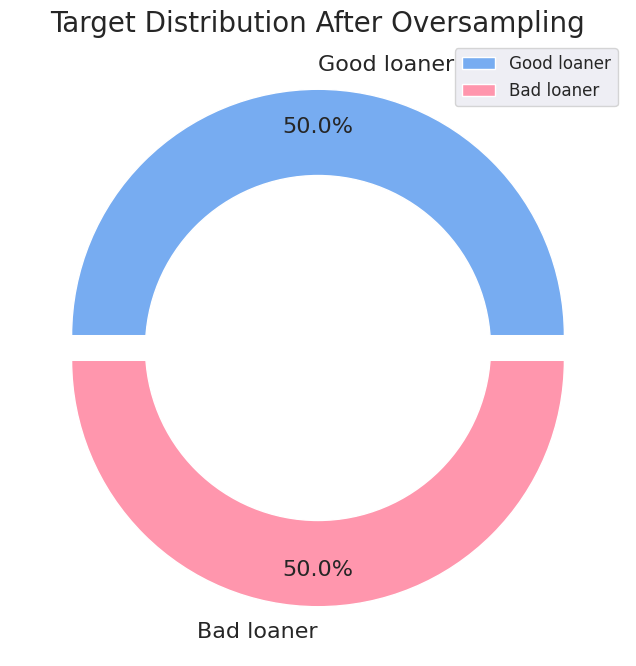

In [87]:
gl = sum(y_train_res==1)
bl = sum(y_train_res==0)
sizes = [gl, bl]

# Setting labels for items in Chart
labels = ['Good loaner','Bad loaner']

# colors
colors = ['#77ACF1','#FF96AD']

# explosion
explode = (0.05, 0.05)

plt.figure(figsize=(12,8))
# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode, textprops={'fontsize': 16})

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Target Distribution After Oversampling', fontsize=20)

# Add Legends
plt.legend(labels, loc="upper right")

# Displaying Chart
plt.show()

# Modelling

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
lr.fit(X_train_res, y_train_res)
Y_pred = lr.predict(X_test)
acc_lr = round(lr.score(X_train_res, y_train_res) * 100, 2)
f1_lr = f1_score(y_test, Y_pred, average='micro')
cv_lr = cross_val_score(lr, X_test, y_test, cv=3).mean()
acc_lr

82.63

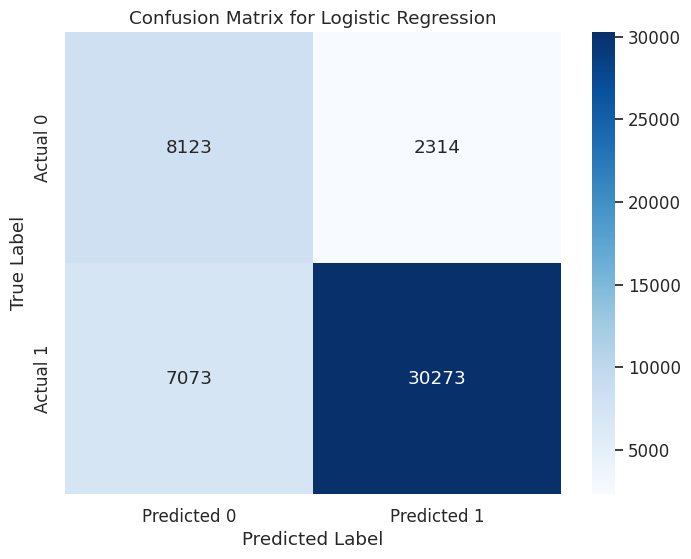

In [101]:

from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [102]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train_res, y_train_res)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train_res, y_train_res) * 100, 2)
f1_gaussian = f1_score(y_test, Y_pred, average='micro')
cv_gaussian = cross_val_score(gaussian, X_test, y_test, cv=3).mean()
acc_gaussian

82.31

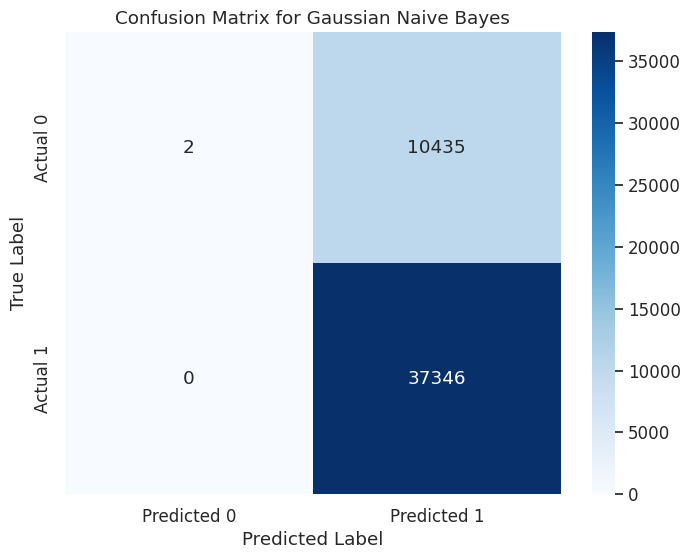

In [104]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

In [114]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train_res, y_train_res)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train_res, y_train_res) * 100, 2)
f1_sgd = f1_score(y_test, Y_pred, average='micro')
cv_sgd = cross_val_score(sgd, X_test, y_test, cv=3).mean()
acc_sgd

80.55

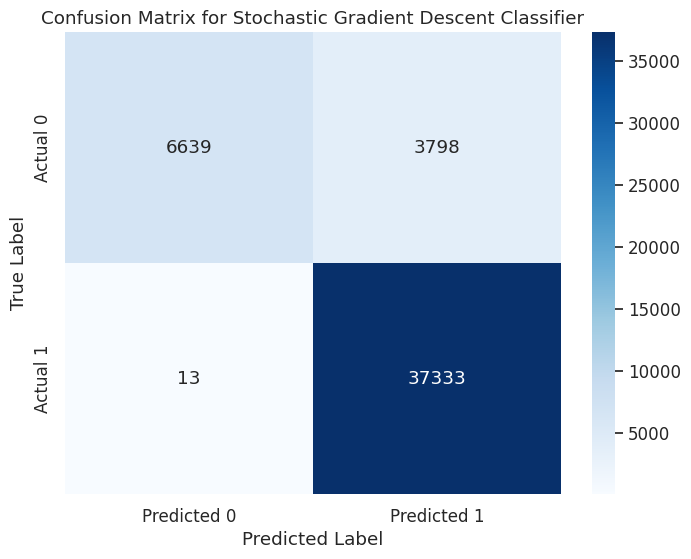

In [115]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stochastic Gradient Descent Classifier')
plt.show()

In [110]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree.fit(X_train_res, y_train_res)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train_res, y_train_res) * 100, 2)
f1_decision_tree = f1_score(y_test, Y_pred, average='micro')
cv_decision_tree = cross_val_score(decision_tree, X_test, y_test, cv=3).mean()
acc_decision_tree

84.03

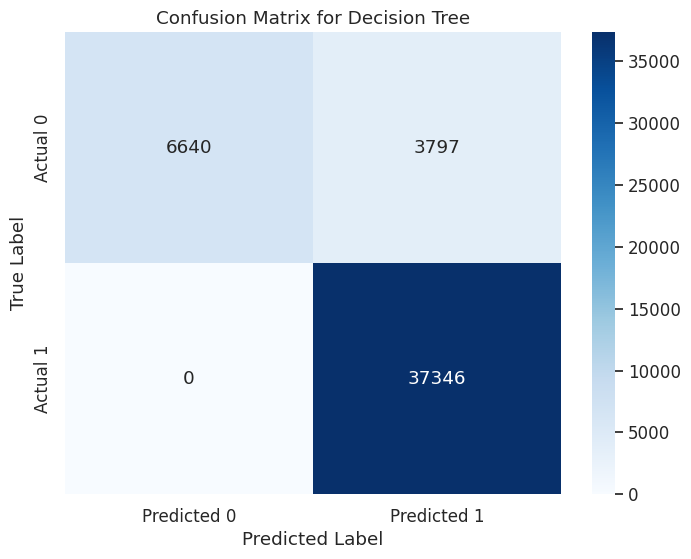

In [111]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [112]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=4)
random_forest.fit(X_train_res, y_train_res)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train_res, y_train_res) * 100, 2)
f1_random_forest = f1_score(y_test, Y_pred, average='micro')
cv_random_forest = cross_val_score(random_forest, X_test, y_test, cv=3).mean()
acc_random_forest

87.11

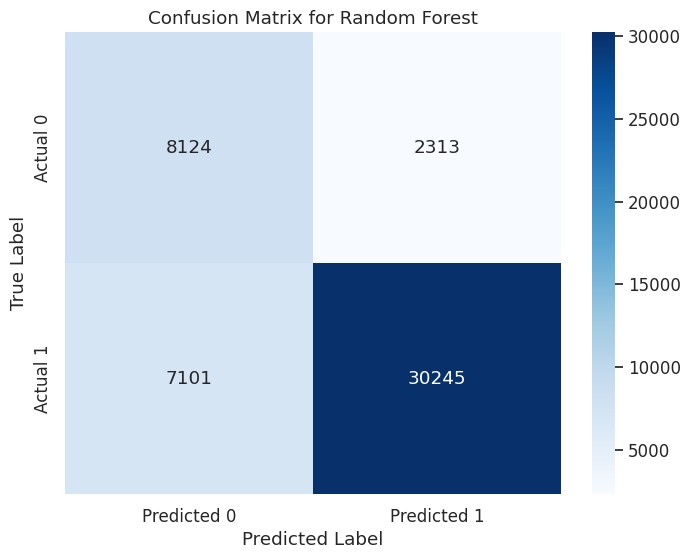

In [113]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

Evaluation Summary

In [93]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest',
              'Naive Bayes',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Acc_Score': [acc_lr,acc_random_forest, acc_gaussian,
              acc_sgd, acc_decision_tree],
    'F1_Score': [f1_lr, f1_random_forest, f1_gaussian,
              f1_sgd, f1_decision_tree],
    'Cross_Val_Score': [cv_lr, cv_random_forest, cv_gaussian,
              cv_sgd, cv_decision_tree]})
evaluation = models.sort_values(by=['Acc_Score','F1_Score','Cross_Val_Score'], ascending=False)

In [94]:
evaluation

,Model,Acc_Score,F1_Score,Cross_Val_Score
1,Random Forest,87.03,0.803549,0.916058
4,Decision Tree,84.03,0.920537,0.920767
0,Logistic Regression,82.63,0.781575,0.920453
3,Stochastic Gradient Decent,82.46,0.920369,0.884185
2,Naive Bayes,82.31,0.781617,0.914007


In [97]:
y_pred_proba = random_forest.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

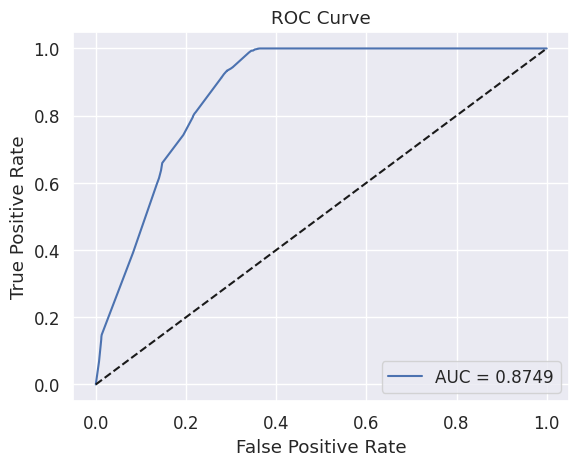

In [98]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()